<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Jul 12 09:37:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.61                 Driver Version: 572.61         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   48C    P3             15W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.7.0+cu128


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [5]:
# libraries
from pathlib import Path
import zipfile
import requests

In [12]:
# 1. Get data
data_path = Path("data/")
pizza_data_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if pizza_data_path.is_dir():
  print(f"directory exists.")
else: 
  print(f"creating directory...")
  pizza_data_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data (images from GitHub)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, suhsi data to {pizza_data_path}")
  zip_ref.extractall(pizza_data_path) 

directory exists.
Unzipping pizza, steak, suhsi data to data\pizza_steak_sushi


In [13]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    

In [16]:
walk_through_dir(pizza_data_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [17]:
# Setup train and testing paths
train_path = pizza_data_path / "train"
test_path = pizza_data_path / "test"

train_path, test_path


(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [21]:
import random
from PIL import Image

In [ ]:
# Visualize an image

# get all the image paths
image_paths = list(pizza_data_path.glob("*/*/*.jpg"))
print(image_paths[:4])

# random image
rand_img_path = random.choice(image_paths)
# img class
img_class = rand_img_path.parent.stem
print(img_class)

# read the img, Image visulaization by PIL -> Image
img = Image.open(rand_img_path)
img.mode, img.width, img.height

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg')]
pizza


('RGB', 512, 512)

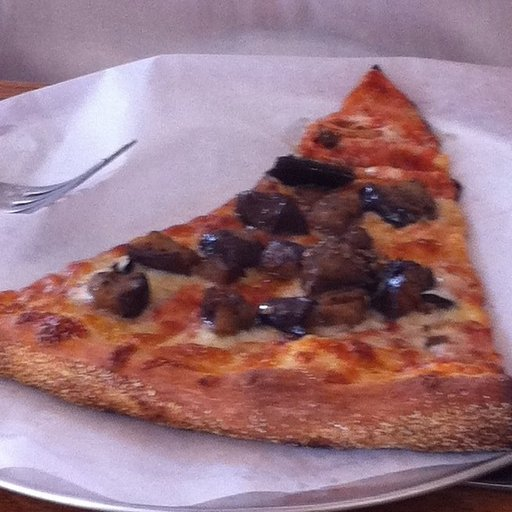

In [26]:
img

In [28]:
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 511.5, 511.5, -0.5)

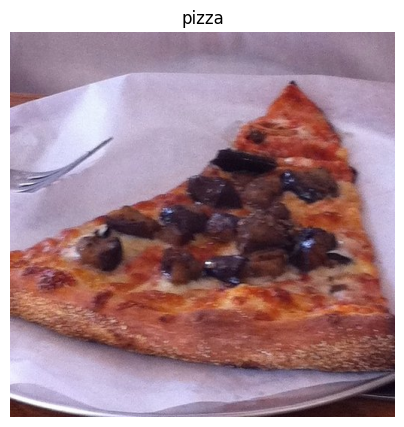

In [29]:
# Do the image visualization with matplotlib
img_array = np.asarray(img)
plt.figure(figsize=(5,5))
plt.imshow(img_array)
plt.title(img_class)
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [31]:
from torchvision import transforms

In [ ]:
# 3.1 Transforming data with torchvision.transforms
transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [33]:
random.sample(image_paths, k=3)

[WindowsPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/2760984.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/715169.jpg')]

In [43]:
# Write a function to plot transformed images
def plot_transformed_imgs(image_paths, transforms, k=3, random_seed = 42):
    random.seed(random_seed)
    random_img_paths = random.sample(image_paths, k=k)
    for i, image_path in enumerate(random_img_paths):
        fig, ax = plt.subplots(nrows=1, ncols=2)

        with Image.open(image_path) as img:
            ax[0].imshow(img)
            ax[0].set_title("original image")
            ax[0].axis(False)

            # after transform
            transformed_img = transforms(img).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title("transformed image")
            ax[1].axis(False)
        fig.suptitle(f"Image {i+1}: {image_path.parent.stem}")    
    

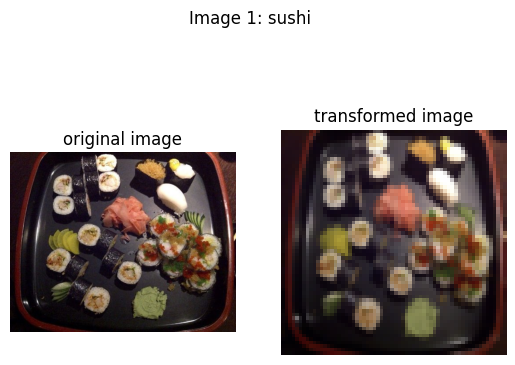

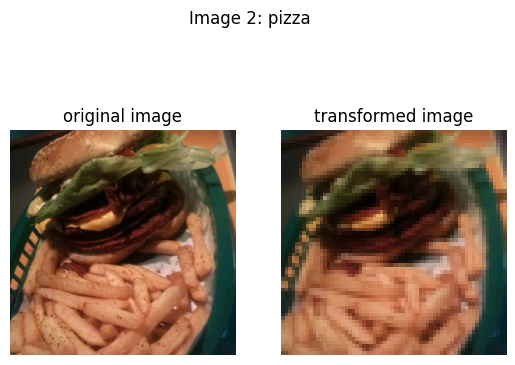

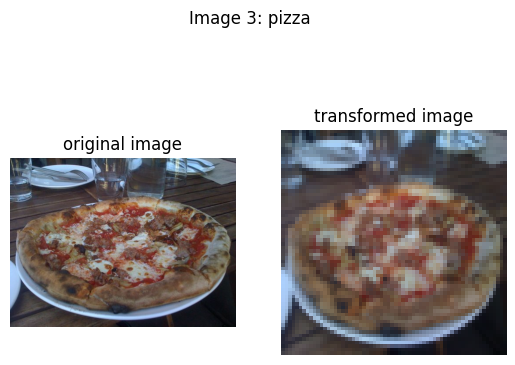

In [44]:
plot_transformed_imgs(image_paths,transform)

### Load image data using `ImageFolder`

In [46]:
from torchvision import datasets

In [47]:
# Use ImageFolder to create dataset(s)
train_dataset = datasets.ImageFolder(
    root=train_path,
    transform=transform
)

test_dataset = datasets.ImageFolder(
    root=test_path,
    transform=transform
)

train_dataset, test_dataset

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [48]:
# Get class names as a list
class_names = train_dataset.classes
class_names

['pizza', 'steak', 'sushi']

In [49]:
# Can also get class names as a dict
class_dict = train_dataset.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [52]:
# Check the lengths of each dataset
len(train_dataset), len(test_dataset)

(225, 75)

In [53]:
from torch.utils.data import DataLoader

In [54]:
# Turn train and test Datasets into DataLoaders
batch_size = 32
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=batch_size,
                              shuffle=True
                              )
test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size=batch_size,
                              shuffle=False
                              )
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1c99adcab10>,
 <torch.utils.data.dataloader.DataLoader at 0x1c99a8ae0f0>)

In [55]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(8, 3)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [56]:
import torch
from torch import nn

In [58]:
class TinyVGG(nn.Module):
    def __init__(self, in_channels, out_features, hidden_units, kernel_size):
        super().__init__()
        self.layers = nn.Sequential(
            # conv_block1
            nn.Conv2d(in_channels=in_channels, out_channels= hidden_units, kernel_size=kernel_size, stride=1, padding=1),
            nn.ReLU(), 
            nn.Conv2d(in_channels=hidden_units, out_channels= hidden_units, kernel_size=kernel_size, stride=1, padding=1),
            nn.ReLU(), 
            nn.MaxPool2d(2),

            # conv_block2
            nn.Conv2d(in_channels=hidden_units, out_channels= hidden_units, kernel_size=kernel_size, stride=1, padding=1),
            nn.ReLU(), 
            nn.Conv2d(in_channels=hidden_units, out_channels= hidden_units, kernel_size=kernel_size, stride=1, padding=1),
            nn.ReLU(), 
            nn.MaxPool2d(2),

            # classifier
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16, out_features=out_features)
        )
    def forward(self, x):
        return self.layers(x)
        

In [62]:
model_0 = TinyVGG(in_channels=3, out_features=len(class_names), hidden_units=10, kernel_size=3).to(device)
model_0

TinyVGG(
  (layers): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [63]:
# Pass dummy data through model
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))

tensor([[-0.0104, -0.0432, -0.0003]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

## 4. Create training and testing functions for `model_0`.

In [82]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for (X, y) in dataloader:
    # Send data to target device
    X = X.to(device)
    y = y.to(device)

    # 1. Forward pass
    logit = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(logit, y)
    train_loss += loss

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred = torch.argmax(torch.softmax(logit, dim=1), dim=1)
    train_acc += (y_pred == y).sum().item()/len(logit) 

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [83]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for (X, y) in dataloader:

      # Send data to target device
      X = X.to(device)
      y = y.to(device)

      # 1. Forward pass
      logit = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(logit, y)
      test_loss += loss

      # Calculate and accumulate accuracy
      y_pred_class = torch.argmax(torch.softmax(logit, dim=1), dim=1)
      test_acc += (y_pred_class == y).sum().item()/len(logit)
    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [84]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [90]:
model_1 = TinyVGG(in_channels=3, out_features=len(class_names), hidden_units=10, kernel_size=3).to(device)

In [86]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), 
                             lr=0.001)

train(model=model_1, train_dataloader=train_dataloader, test_dataloader=test_dataloader,
      optimizer= optimizer, loss_fn= loss_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1060 | train_acc: 0.2812 | test_loss: 1.1054 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0782 | train_acc: 0.4258 | test_loss: 1.1401 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0801 | train_acc: 0.4258 | test_loss: 1.1716 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1294 | train_acc: 0.3047 | test_loss: 1.1605 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0901 | train_acc: 0.4258 | test_loss: 1.1398 | test_acc: 0.2604


{'train_loss': [tensor(1.1060, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0782, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0801, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1294, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0901, device='cuda:0', grad_fn=<DivBackward0>)],
 'train_acc': [0.28125, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [tensor(1.1054, device='cuda:0'),
  tensor(1.1401, device='cuda:0'),
  tensor(1.1716, device='cuda:0'),
  tensor(1.1605, device='cuda:0'),
  tensor(1.1398, device='cuda:0')],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667]}

In [91]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), 
                             lr=0.001)

train(model=model_1, train_dataloader=train_dataloader, test_dataloader=test_dataloader,
      optimizer= optimizer, loss_fn= loss_fn, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1044 | train_acc: 0.2812 | test_loss: 1.1071 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0729 | train_acc: 0.4258 | test_loss: 1.1406 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0674 | train_acc: 0.4258 | test_loss: 1.1588 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.0424 | train_acc: 0.4570 | test_loss: 1.0806 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0112 | train_acc: 0.4453 | test_loss: 1.0613 | test_acc: 0.3125
Epoch: 6 | train_loss: 0.9721 | train_acc: 0.5547 | test_loss: 1.0124 | test_acc: 0.4233
Epoch: 7 | train_loss: 0.9040 | train_acc: 0.5352 | test_loss: 1.0533 | test_acc: 0.4725
Epoch: 8 | train_loss: 0.8705 | train_acc: 0.6094 | test_loss: 1.1256 | test_acc: 0.2917
Epoch: 9 | train_loss: 0.9658 | train_acc: 0.4609 | test_loss: 1.0043 | test_acc: 0.5142
Epoch: 10 | train_loss: 0.9214 | train_acc: 0.4570 | test_loss: 0.9295 | test_acc: 0.5739
Epoch: 11 | train_loss: 0.8182 | train_acc: 0.6250 | test_loss: 1.0842 | test_acc: 0.3011
Epoch: 12 | train_l

{'train_loss': [tensor(1.1044, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0729, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0674, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0424, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0112, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9721, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9040, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8705, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9658, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9214, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8182, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8530, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.7916, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.7418, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8039, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.7138, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.7053, device='cuda:0', grad_fn=

In [92]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), 
                             lr=0.001)

train(model=model_1, train_dataloader=train_dataloader, test_dataloader=test_dataloader,
      optimizer= optimizer, loss_fn= loss_fn, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6815 | train_acc: 0.7344 | test_loss: 1.2971 | test_acc: 0.3532
Epoch: 2 | train_loss: 0.7593 | train_acc: 0.5859 | test_loss: 0.9826 | test_acc: 0.4744
Epoch: 3 | train_loss: 0.6003 | train_acc: 0.8125 | test_loss: 1.0498 | test_acc: 0.4138
Epoch: 4 | train_loss: 0.5309 | train_acc: 0.7734 | test_loss: 1.0378 | test_acc: 0.4650
Epoch: 5 | train_loss: 0.5360 | train_acc: 0.8398 | test_loss: 1.0719 | test_acc: 0.4441
Epoch: 6 | train_loss: 0.5650 | train_acc: 0.7930 | test_loss: 1.1774 | test_acc: 0.4138
Epoch: 7 | train_loss: 0.5647 | train_acc: 0.7812 | test_loss: 1.3327 | test_acc: 0.3939
Epoch: 8 | train_loss: 0.5690 | train_acc: 0.7852 | test_loss: 1.0651 | test_acc: 0.5256
Epoch: 9 | train_loss: 0.5913 | train_acc: 0.6758 | test_loss: 1.1547 | test_acc: 0.4138
Epoch: 10 | train_loss: 0.5201 | train_acc: 0.7812 | test_loss: 1.0579 | test_acc: 0.6051
Epoch: 11 | train_loss: 0.4539 | train_acc: 0.8398 | test_loss: 1.3395 | test_acc: 0.3532
Epoch: 12 | train_l

{'train_loss': [tensor(0.6815, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.7593, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.6003, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5309, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5360, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5650, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5647, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5690, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5913, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5201, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.4539, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.4094, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.4182, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.4590, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.4191, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.3312, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.3055, device='cuda:0', grad_fn=

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [99]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = TinyVGG(in_channels=3, out_features=len(class_names), hidden_units=20, kernel_size=3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), 
                             lr=0.001)

train(model=model_2, train_dataloader=train_dataloader, test_dataloader=test_dataloader,
      optimizer= optimizer, loss_fn= loss_fn, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1073 | train_acc: 0.4180 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.1263 | train_acc: 0.3047 | test_loss: 1.1013 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0950 | train_acc: 0.3242 | test_loss: 1.0957 | test_acc: 0.3741
Epoch: 4 | train_loss: 1.0911 | train_acc: 0.4414 | test_loss: 1.0658 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0575 | train_acc: 0.5391 | test_loss: 1.0280 | test_acc: 0.5758
Epoch: 6 | train_loss: 0.9820 | train_acc: 0.5781 | test_loss: 1.1363 | test_acc: 0.3229
Epoch: 7 | train_loss: 1.0240 | train_acc: 0.4688 | test_loss: 0.9149 | test_acc: 0.5739
Epoch: 8 | train_loss: 0.9041 | train_acc: 0.6094 | test_loss: 1.0880 | test_acc: 0.3125
Epoch: 9 | train_loss: 0.8748 | train_acc: 0.4805 | test_loss: 0.9867 | test_acc: 0.4138
Epoch: 10 | train_loss: 0.9785 | train_acc: 0.5000 | test_loss: 0.9757 | test_acc: 0.5133
Epoch: 11 | train_loss: 0.8819 | train_acc: 0.5898 | test_loss: 1.0661 | test_acc: 0.3939
Epoch: 12 | train_l

{'train_loss': [tensor(1.1073, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1263, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0950, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0911, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0575, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9820, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0240, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9041, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8748, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9785, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8819, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9492, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8695, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9309, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9773, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.7463, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8062, device='cuda:0', grad_fn=

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [93]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

Did not find data\pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [94]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images... 

In [95]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [97]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
double_train_dataset = ImageFolder(train_data_20_percent_path,
                                   simple_transform)
double_test_dataset = ImageFolder(test_data_20_percent_path,
                                   simple_transform)

# Create dataloaders
BATCH_SIZE = 32
double_train_dataloader = DataLoader(dataset=double_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
double_test_dataloader = DataLoader(dataset=double_test_dataset, batch_size=BATCH_SIZE, shuffle=False)

double_test_dataloader, double_train_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x1c99adcb680>,
 <torch.utils.data.dataloader.DataLoader at 0x1c99adcbe90>)

In [138]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(in_channels=3, out_features=len(class_names), hidden_units=20, kernel_size=3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), 
                             lr=0.001)
train(model=model_3, train_dataloader=train_dataloader, test_dataloader=test_dataloader,
      optimizer= optimizer, loss_fn= loss_fn, epochs=50)


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1073 | train_acc: 0.4180 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.1263 | train_acc: 0.3047 | test_loss: 1.1013 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0950 | train_acc: 0.3242 | test_loss: 1.0957 | test_acc: 0.3845
Epoch: 4 | train_loss: 1.0911 | train_acc: 0.4453 | test_loss: 1.0655 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0571 | train_acc: 0.5391 | test_loss: 1.0267 | test_acc: 0.5862
Epoch: 6 | train_loss: 0.9769 | train_acc: 0.5703 | test_loss: 1.1492 | test_acc: 0.3125
Epoch: 7 | train_loss: 1.0382 | train_acc: 0.4609 | test_loss: 0.9186 | test_acc: 0.5227
Epoch: 8 | train_loss: 0.9147 | train_acc: 0.5859 | test_loss: 1.1129 | test_acc: 0.3125
Epoch: 9 | train_loss: 0.8874 | train_acc: 0.4883 | test_loss: 0.9952 | test_acc: 0.3627
Epoch: 10 | train_loss: 0.9703 | train_acc: 0.5312 | test_loss: 0.9639 | test_acc: 0.5133
Epoch: 11 | train_loss: 0.8980 | train_acc: 0.5820 | test_loss: 1.0246 | test_acc: 0.4242
Epoch: 12 | train_l

{'train_loss': [tensor(1.1073, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1263, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0950, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0911, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0571, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9769, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0382, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9147, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8874, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9703, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8980, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9341, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8631, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9394, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9673, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.7435, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8052, device='cuda:0', grad_fn=

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [113]:
# Setup custom image path
custom_image_path = data_path / "my_pizza_test.jpg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    print("image doesnt exist")
else:
    print(f"{custom_image_path} already exists.")

data\my_pizza_test.jpg already exists.


In [114]:
import torchvision
# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[218, 237, 222,  ..., 118, 161, 178],
         [235, 248, 230,  ..., 187, 236, 180],
         [255, 255, 246,  ..., 196, 242, 178],
         ...,
         [223, 209, 223,  ..., 190, 175, 186],
         [228, 220, 222,  ..., 173, 143, 147],
         [224, 230, 239,  ..., 147, 162, 128]],

        [[212, 231, 216,  ...,  88, 132, 156],
         [229, 242, 224,  ..., 163, 211, 158],
         [253, 253, 240,  ..., 182, 226, 158],
         ...,
         [200, 189, 204,  ..., 166, 143, 150],
         [204, 196, 198,  ..., 153, 114, 112],
         [195, 200, 206,  ..., 130, 136,  97]],

        [[214, 233, 218,  ...,  90, 134, 159],
         [231, 244, 226,  ..., 163, 214, 161],
         [255, 255, 242,  ..., 181, 226, 160],
         ...,
         [166, 156, 172,  ..., 154, 128, 126],
         [166, 160, 164,  ..., 142,  98,  90],
         [161, 166, 173,  ..., 122, 123,  77]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 225, 225])

Custom image dtype

In [115]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.8549, 0.9294, 0.8706,  ..., 0.4627, 0.6314, 0.6980],
         [0.9216, 0.9725, 0.9020,  ..., 0.7333, 0.9255, 0.7059],
         [1.0000, 1.0000, 0.9647,  ..., 0.7686, 0.9490, 0.6980],
         ...,
         [0.8745, 0.8196, 0.8745,  ..., 0.7451, 0.6863, 0.7294],
         [0.8941, 0.8627, 0.8706,  ..., 0.6784, 0.5608, 0.5765],
         [0.8784, 0.9020, 0.9373,  ..., 0.5765, 0.6353, 0.5020]],

        [[0.8314, 0.9059, 0.8471,  ..., 0.3451, 0.5176, 0.6118],
         [0.8980, 0.9490, 0.8784,  ..., 0.6392, 0.8275, 0.6196],
         [0.9922, 0.9922, 0.9412,  ..., 0.7137, 0.8863, 0.6196],
         ...,
         [0.7843, 0.7412, 0.8000,  ..., 0.6510, 0.5608, 0.5882],
         [0.8000, 0.7686, 0.7765,  ..., 0.6000, 0.4471, 0.4392],
         [0.7647, 0.7843, 0.8078,  ..., 0.5098, 0.5333, 0.3804]],

        [[0.8392, 0.9137, 0.8549,  ..., 0.3529, 0.5255, 0.6235],
         [0.9059, 0.9569, 0.8863,  ..., 0.6392, 0.8392, 0.6314],
         [1.0000, 1.0000, 0.9490,  ..

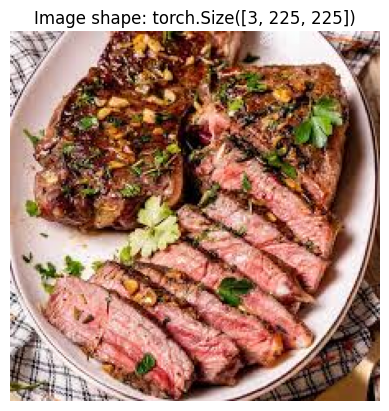

In [116]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [117]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 225, 225])
New shape: torch.Size([3, 64, 64])


In [139]:
model_3.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_3(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [140]:
custom_image_pred_label = torch.argmax(torch.softmax(custom_image_pred, dim=1), dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction label: tensor([0], device='cuda:0')


In [141]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'